# Logistic Regression 
Used to solve classification problems i.e output which has finite solns.
## Binary classification
Binary classification is on e of the algo in which the ouptut generally has one of the two outputs <br>
0 or 1 <br>
    True or False <br>
    malign or benign of tumor size

## Sigmoid or Logistic Function
As discussed in the lecture videos, for a classification task, we can start by using our linear regression model, $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot  \mathbf{x}^{(i)} + b$, to predict $y$ given $x$. 
- However, we would like the predictions of our classification model to be between 0 and 1 since our output variable $y$ is either 0 or 1. 
- This can be accomplished by using a "sigmoid function" which maps all input values to values between 0 and 1. 

<img src="/media/indraneel/YO/Programming/ML/datafiles/sig-func.png"  alt = "Sigmoid function graph " align = "left" style=" width:300px; padding: 5px;">
Let's implement the sigmoid function and see this for ourselves.

## Formula for Sigmoid function

The formula for a sigmoid function is as follows -  

$$g(z) = \frac{1}{1+e^{-z}}$$

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model. 
- In the case of a single example, $z$ is scalar.
- in the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example. 
- The implementation of the sigmoid function should cover both of these potential input formats.
Let's implement this in Python.

In [1]:
# numpy has exp module which calcualtes e^-z value 
import numpy as np 
import matplotlib.pyplot as plt
a = np.array([1,2,3])
b = np.exp(a)
print("Input (z), Output (sigmoid(z))")
print(np.c_[a,b])

c = 3
print(np.exp(c))

Input (z), Output (sigmoid(z))
[[ 1.          2.71828183]
 [ 2.          7.3890561 ]
 [ 3.         20.08553692]]
20.085536923187668


In [2]:
# Defining sigmoid func
def sigmoid(z):
    """    
      Compute the sigmoid of z
    Args:
        z (ndarray): A scalar, numpy array of any size.
    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    return 1/(1 + np.exp(-z))

In [3]:
# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10,10)

# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

# Code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3) 
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])

Input (z), Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]]


## Logistic Regression
A logistic regression model applies the sigmoid to the familiar linear regression model as shown below:

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) \tag{2} $$ 

  where

  $$g(z) = \frac{1}{1+e^{-z}}$$

In [4]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

w_in = np.zeros((1))
b_in = 0

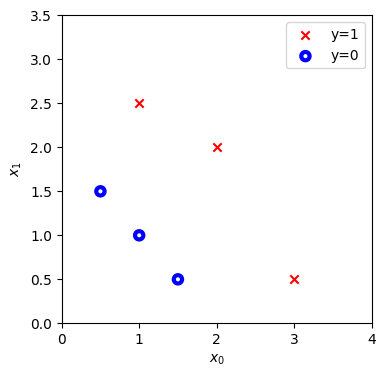

In [5]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 


# Find Indices of Positive and Negative Examples
pos = y == 1
neg = y == 0
pos = pos.reshape(-1,)  #work with 1D or 1D y vectors
neg = neg.reshape(-1,)
# Plot examples
fig,ax = plt.subplots(1,1,figsize=(4,4))
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
ax.scatter(X[pos, 0], X[pos, 1], marker='x', c = 'red', label="y=1")
ax.scatter(X[neg, 0], X[neg, 1], marker='o', label="y=0", facecolors='none', edgecolors="blue", lw=3)
ax.legend()
plt.show()